# Kode Program

In [128]:
## for data
import pandas as pd
import numpy as np
## for plotting
import matplotlib.pyplot as plt
import seaborn as sns
## for machine learning
from sklearn import model_selection, preprocessing, feature_selection, ensemble, linear_model, metrics, decomposition

# Import basic libraries
# evaluate a logistic regression model using k-fold cross-validation
from numpy import mean
from numpy import std
import os
import pandas as pd 
import numpy as np
import seaborn as sns
from string import ascii_uppercase
from pandas import DataFrame
import matplotlib.pyplot as plt        
%matplotlib inline
from sklearn.model_selection import KFold
import sklearn.preprocessing as skp
import sklearn.model_selection as skm
import os
#import classification modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
# Selection
from sklearn.model_selection import GridSearchCV as gs
from sklearn.model_selection import RandomizedSearchCV as rs
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
#import decision tree plotting libraries
# Metrics
from sklearn.metrics import accuracy_score, confusion_matrix,precision_score, recall_score, roc_auc_score,roc_curve, auc, f1_score 
from sklearn.model_selection import cross_val_score


from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import QuantileTransformer

import pyswarms as ps

## Preprocessing Data 

In [129]:
data = pd.read_csv('fix 4.csv')

In [130]:
data.shape

(97, 24)

In [131]:
data

,Jenis_Beasiswa,Bidang_Riset,Matematika_Komputasi,Jaringan / Sistem Operasi,Basis_Data,Algoritma_dan_Pemrograman,Nilai_Akhir_Tes_Bidang,Nilai_Setara_IPK,3kreditas_Kampus_3sal,Motivasi_Studi,...,Problem_Solving,Literature_Review,Team_Work,Nilai_Akhir_Interview,Jenis_TOEFL,Nilai_TOEFL,Jenis_TPA,Nilai_TPA,Nilai_Total,Lama_Kuliah
0,1,1,0.00,20.01,33.40,20.01,18.36,79.65,2,75,...,70,65,72,69.200000,4,75.07,3,62.67,57.66,6
1,1,2,6.70,40.02,33.40,26.70,26.71,64.13,2,85,...,82,68,82,76.300000,1,68.00,1,50.00,57.30,5
2,1,3,30.14,30.14,30.14,30.14,30.14,81.87,3,80,...,75,70,70,76.230000,1,76.97,1,68.67,66.24,4
3,3,3,30.14,30.14,30.14,30.14,30.14,81.87,3,80,...,80,70,70,76.230000,1,76.97,1,68.67,66.24,4
4,1,3,13.34,13.34,40.02,20.01,21.68,74.93,2,70,...,70,50,75,66.000000,4,97.00,3,69.00,59.88,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,1,4,40.00,50.00,10.00,110.00,50.10,85.75,3,80,...,75,75,75,70.714286,4,93.73,3,106.42,74.13,5
93,1,4,50.00,80.00,110.00,130.00,61.79,81.90,3,80,...,75,80,75,75.000000,1,60.00,1,70.00,66.89,4
94,1,4,50.00,30.00,70.00,20.00,28.39,86.75,3,80,...,60,70,80,78.670000,4,78.67,3,93.98,60.55,4
95,4,1,40.00,60.00,110.00,40.00,41.75,78.25,3,80,...,80,80,80,81.730000,4,81.73,3,105.78,69.19,4


In [132]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Jenis_Beasiswa              97 non-null     int64  
 1   Bidang_Riset                97 non-null     int64  
 2   Matematika_Komputasi        97 non-null     float64
 3   Jaringan /  Sistem Operasi  97 non-null     float64
 4   Basis_Data                  97 non-null     float64
 5   Algoritma_dan_Pemrograman   97 non-null     float64
 6   Nilai_Akhir_Tes_Bidang      97 non-null     float64
 7   Nilai_Setara_IPK            97 non-null     float64
 8   3kreditas_Kampus_3sal       97 non-null     int64  
 9   Motivasi_Studi              97 non-null     int64  
 10  Motivasi_Beasiswa           97 non-null     int64  
 11  Pengalaman                  97 non-null     int64  
 12  Rencana_Riset               97 non-null     int64  
 13  Komunikasi                  97 non-nu

In [133]:
X = data.drop('Lama_Kuliah', axis=1)
y = data['Lama_Kuliah']

In [134]:
list(X.columns)

['Jenis_Beasiswa',
 'Bidang_Riset',
 'Matematika_Komputasi',
 'Jaringan /  Sistem Operasi',
 'Basis_Data',
 'Algoritma_dan_Pemrograman',
 'Nilai_Akhir_Tes_Bidang',
 'Nilai_Setara_IPK',
 '3kreditas_Kampus_3sal',
 'Motivasi_Studi',
 'Motivasi_Beasiswa',
 'Pengalaman',
 'Rencana_Riset',
 'Komunikasi',
 'Problem_Solving',
 'Literature_Review',
 'Team_Work',
 'Nilai_Akhir_Interview',
 'Jenis_TOEFL',
 'Nilai_TOEFL',
 'Jenis_TPA',
 'Nilai_TPA',
 'Nilai_Total']

Counter({4: 40, 5: 35, 6: 11, 3: 11})


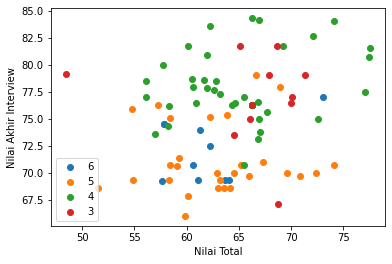

In [135]:
# Generate and plot a synthetic imbalanced classification dataset
from collections import Counter
from sklearn.datasets import make_classification
from matplotlib import pyplot
from numpy import where
# define dataset
counter = Counter(y.to_numpy())
print(counter)
# scatter plot of examples by class label
for label, _ in counter.items():
	row_ix = where(y.to_numpy() == label)[0]
	pyplot.scatter(X.to_numpy()[row_ix, 22], X.to_numpy()[row_ix, 17], label=str(label))
pyplot.xlabel("Nilai Total")
pyplot.ylabel("Nilai Akhir Interview")
pyplot.legend()
pyplot.show()

In [136]:
X.max()

Jenis_Beasiswa                  4.00
Bidang_Riset                    5.00
Matematika_Komputasi           80.00
Jaringan /  Sistem Operasi     80.00
Basis_Data                    140.00
Algoritma_dan_Pemrograman     140.00
Nilai_Akhir_Tes_Bidang         65.13
Nilai_Setara_IPK               95.50
3kreditas_Kampus_3sal           3.00
Motivasi_Studi                 90.00
Motivasi_Beasiswa              85.00
Pengalaman                     86.00
Rencana_Riset                  90.00
Komunikasi                     90.00
Problem_Solving                90.00
Literature_Review              85.00
Team_Work                      90.00
Nilai_Akhir_Interview          84.30
Jenis_TOEFL                     4.00
Nilai_TOEFL                    97.00
Jenis_TPA                       3.00
Nilai_TPA                     113.34
Nilai_Total                    77.58
dtype: float64

In [137]:
# build the scaler model
X = pd.DataFrame(MinMaxScaler().fit_transform(X), columns=X.columns, index=X.index)

### Akurasi RF 

In [138]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [139]:
# fit the model
model = RandomForestClassifier()
model.fit(X_train, y_train)
# make predictions
yPred = model.predict(X_test)
# evaluate predictions
acc = accuracy_score(y_test, yPred)
print('Accuracy', acc)

Accuracy 0.7


In [140]:
from sklearn.metrics import classification_report
target_names = ['3','4','5','6']
print(classification_report(y_test, yPred, target_names=target_names))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.86      0.60      0.71        10
           5       0.73      0.89      0.80         9
           6       0.00      0.00      0.00         0

    accuracy                           0.70        20
   macro avg       0.40      0.37      0.38        20
weighted avg       0.76      0.70      0.71        20



c:\users\rifky\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\rifky\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\rifky\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(r

## Oversampling - SMOTE

In [141]:
from imblearn.over_sampling import SMOTE, ADASYN,BorderlineSMOTE

<AxesSubplot:>

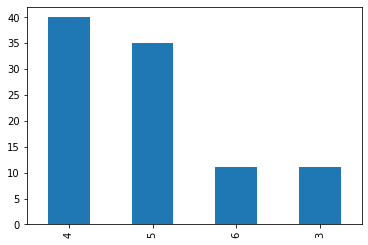

In [142]:
y.value_counts().plot.bar()

In [143]:
X_resampled, y_resampled = SMOTE().fit_resample(X, y)

<AxesSubplot:>

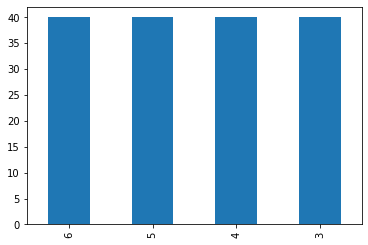

In [144]:
y_resampled.value_counts().plot.bar()

In [145]:
X_resampled.shape

(160, 23)

### Akurasi RF + SMOTE 

In [146]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size = 0.2)

In [147]:
# fit the model
model = RandomForestClassifier(bootstrap= True,
                                   max_depth= None,
                                   max_features= 'auto',
                                   min_samples_leaf= 2,
                                   min_samples_split= 5,
                                   n_estimators= 162)
model.fit(X_train, y_train)
# make predictions
yPred = model.predict(X_test)
# evaluate pre`1dictions
acc = accuracy_score(y_test, yPred)
print('Accuracy', acc)

Accuracy 0.8125


In [148]:
from sklearn.metrics import classification_report
target_names = ['3','4','5','6']
print(classification_report(y_test, yPred, target_names=target_names))

              precision    recall  f1-score   support

           3       0.80      1.00      0.89         8
           4       1.00      0.75      0.86         8
           5       1.00      0.60      0.75        10
           6       0.60      1.00      0.75         6

    accuracy                           0.81        32
   macro avg       0.85      0.84      0.81        32
weighted avg       0.88      0.81      0.81        32



### Akurasi RF + SMOTE + RFE

In [149]:
X_resampled = X_resampled.drop(['Jenis_TPA', 'Jenis_Beasiswa', 'Motivasi_Beasiswa'], axis=1)

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size = 0.2)

In [104]:
# fit the model
model = RandomForestClassifier()
model.fit(X_train, y_train)
# make predictions
yPred = model.predict(X_test)
# evaluate pre`1dictions
acc = accuracy_score(y_test, yPred)
print('Accuracy', acc)

Accuracy 0.84375


In [105]:
from sklearn.metrics import classification_report
target_names = ['3','4','5','6']
print(classification_report(y_test, yPred, target_names=target_names))

              precision    recall  f1-score   support

           3       0.91      1.00      0.95        10
           4       0.75      0.60      0.67         5
           5       0.67      0.86      0.75         7
           6       1.00      0.80      0.89        10

    accuracy                           0.84        32
   macro avg       0.83      0.81      0.81        32
weighted avg       0.86      0.84      0.84        32



### Akurasi RF + SMOTE + HPO 

In [319]:
import math
def svc2(x):
    if (int(abs(x[0]) < 1)):
        boot = False
    else:
        boot = True
        
    if (int(abs(x[1]) < 4)):
        depth = None
    else:
        depth = int(abs(x[1]))
    
    if (int(abs(x[2])) < 2):
        features = 'auto' 
    else:
        features = int(abs(x[2]))
        
    model = RandomForestClassifier(bootstrap= boot,
                                   max_depth= depth,
                                   max_features= features,
                                   min_samples_leaf= int(abs(x[3])),
                                   min_samples_split= int(abs(x[4])),
                                   n_estimators= int(abs(x[5])))
    acc = cross_val_score(model, X_train, y_train, cv=5,scoring='accuracy')
    inv_acc = 1/(np.mean(acc))
    return inv_acc

In [320]:
def s(x):
    n_particles = x.shape[0]
    j = [svc2(x[i]) for i in range (n_particles)]
    return np.array(j)

In [297]:
# Create bounds
max_bound = [2, 8, 4, 4, 6, 300]
min_bound = [0, 1, 0, 1, 2, 50]
bounds = (min_bound, max_bound)

In [298]:
import time
start_time = time.time()
options = {'c1': 1.9, 'c2':1.9, 'w':0.5}

dimensions = 6
optimizer = ps.single.GlobalBestPSO(n_particles=10, dimensions=dimensions,
                                   options=options, bounds=bounds)

cost, post = optimizer.optimize(s, iters=20)
print("--- %s seconds ---" % (time.time() - start_time))

2021-12-21 06:25:45,701 - pyswarms.single.global_best - INFO - Optimize for 20 iters with {'c1': 1.9, 'c2': 1.9, 'w': 0.5}
pyswarms.single.global_best: 100%|███████████████████████████████████████████████████████████████|20/20, best_cost=1.28
2021-12-21 06:28:42,715 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 1.2780180888714117, best pos: [  0.96871942   3.54529355   2.74688255   1.37004569   4.28458335
 230.15129888]


--- 177.02048087120056 seconds ---


In [299]:
acc_svm = 1/cost
print(acc_svm)

0.7824615384615385


### Akurasi RF + SMOTE + RFE + PSO

In [151]:
# fit the model
model = RandomForestClassifier(bootstrap= True,
                                   max_depth= None,
                                   max_features= 'auto',
                                   min_samples_leaf= 2,
                                   min_samples_split= 5,
                                   n_estimators= 162)
model.fit(X_train, y_train)
# make predictions
yPred = model.predict(X_test)
# evaluate predictions
acc = accuracy_score(y_test, yPred)
print('Accuracy', acc)

Accuracy 0.84375


In [152]:
n_nodes = []
max_depths = []

for ind_tree in model.estimators_:
    n_nodes.append(ind_tree.tree_.node_count)
    max_depths.append(ind_tree.tree_.max_depth)
    
print(f'Average number of nodes {int(np.mean(n_nodes))}')
print(f'Average maximum depth {int(np.mean(max_depths))}')

Average number of nodes 39
Average maximum depth 7


In [155]:
>>>
>>> from sklearn.datasets import load_iris
>>> from sklearn import tree
>>> iris = load_iris()
>>> X, y = iris.data, iris.target
>>> clf = tree.DecisionTreeClassifier()
>>> clf = clf.fit(X, y)

[Text(167.4, 199.32, 'X[3] <= 0.8\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(141.64615384615385, 163.07999999999998, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(193.15384615384616, 163.07999999999998, 'X[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(103.01538461538462, 126.83999999999999, 'X[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(51.50769230769231, 90.6, 'X[3] <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(25.753846153846155, 54.359999999999985, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(77.26153846153846, 54.359999999999985, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(154.52307692307693, 90.6, 'X[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(128.76923076923077, 54.359999999999985, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(180.27692307692308, 54.359999999999985, 'X[2] <= 5.45\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(154.52307

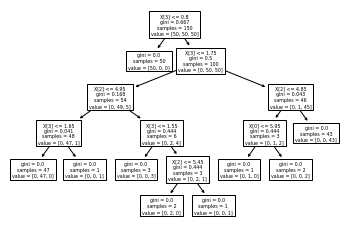

In [156]:
tree.plot_tree(clf)

In [ ]:
>>> import graphviz 
>>> dot_data = tree.export_graphviz(clf, out_file=None) 
>>> graph = graphviz.Source(dot_data) 
>>> graph.render("iris") 

In [ ]:
>>> dot_data = tree.export_graphviz(clf, out_file=None, 
...                      feature_names=iris.feature_names,  
...                      class_names=iris.target_names,  
...                      filled=True, rounded=True,  
...                      special_characters=True)  
>>> graph = graphviz.Source(dot_data)  
>>> graph

In [302]:
from sklearn.metrics import classification_report
target_names = ['3','4','5','6']
print(classification_report(y_test, yPred, target_names=target_names))

              precision    recall  f1-score   support

           3       0.73      0.89      0.80         9
           4       0.83      0.56      0.67         9
           5       0.83      0.83      0.83         6
           6       0.89      1.00      0.94         8

    accuracy                           0.81        32
   macro avg       0.82      0.82      0.81        32
weighted avg       0.82      0.81      0.80        32



## Seleksi Fiture RF-RFE

In [132]:
# decision tree for feature importance on a regression problem
from sklearn.datasets import make_regression
from sklearn.tree import DecisionTreeRegressor
from matplotlib import pyplot
from sklearn import tree
# define the model
# get importance
rfc.fit(X_resampled, y_resampled)
importance = rfc.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

NameError: name 'rfc' is not defined

<BarContainer object of 23 artists>

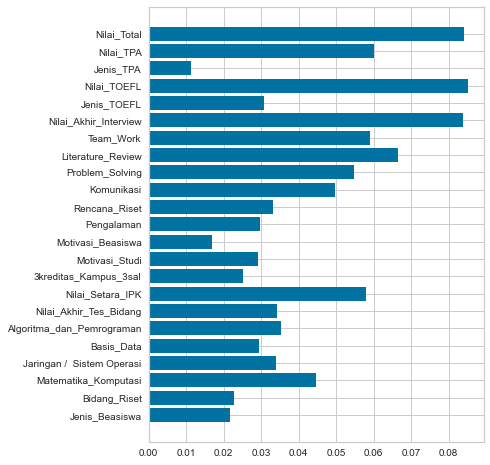

In [1895]:
plt.rcParams.update({'figure.figsize': (6.0, 8.0)})
plt.rcParams.update({'font.size': 14})

plt.barh(list(X_resampled.columns), importance)

In [817]:
rfc = RandomForestClassifier()
rfecv = RFECV(estimator=rfc, step=1, cv=StratifiedKFold(10), scoring='accuracy')
rfecv.fit(X_resampled, y_resampled)

RFECV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
      estimator=RandomForestClassifier(), scoring='accuracy')

In [818]:
print('Optimal number of features: {}'.format(rfecv.n_features_))

Optimal number of features: 21


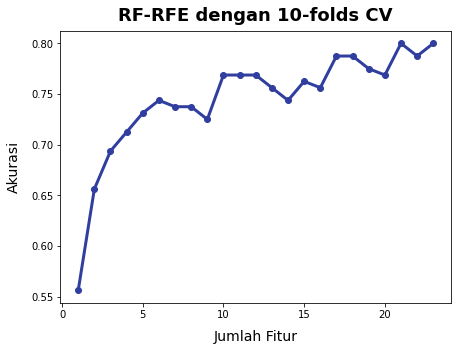

In [819]:
plt.figure(figsize=(7, 5))
plt.title('RF-RFE dengan 10-folds CV', fontsize=18, fontweight='bold', pad=10)
plt.xlabel('Jumlah Fitur', fontsize=14, labelpad=10)
plt.ylabel('Akurasi', fontsize=14, labelpad=10)
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_, color='#303F9F', linewidth=3, marker='o')

plt.show()

In [820]:
print(np.where(rfecv.support_ == False)[0])

X_resampled.drop(X_resampled.columns[np.where(rfecv.support_ == False)[0]], axis=1, inplace=True)

[10 20]


In [821]:
X_resampled.shape

(160, 21)

## Hyperparameter Optimization (Particle Swarm Optimization)

In [1230]:
X_resampled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Jenis_Beasiswa              160 non-null    float64
 1   Bidang_Riset                160 non-null    float64
 2   Matematika_Komputasi        160 non-null    float64
 3   Jaringan /  Sistem Operasi  160 non-null    float64
 4   Basis_Data                  160 non-null    float64
 5   Algoritma_dan_Pemrograman   160 non-null    float64
 6   Nilai_Akhir_Tes_Bidang      160 non-null    float64
 7   Nilai_Setara_IPK            160 non-null    float64
 8   3kreditas_Kampus_3sal       160 non-null    float64
 9   Motivasi_Studi              160 non-null    float64
 10  Motivasi_Beasiswa           160 non-null    float64
 11  Pengalaman                  160 non-null    float64
 12  Rencana_Riset               160 non-null    float64
 13  Komunikasi                  160 non

In [2051]:
X_resampled = X_resampled.drop(['Jenis_TPA', 'Jenis_Beasiswa', 'Motivasi_Beasiswa'], axis=1)

In [1965]:
X_resampled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Bidang_Riset                160 non-null    float64
 1   Matematika_Komputasi        160 non-null    float64
 2   Jaringan /  Sistem Operasi  160 non-null    float64
 3   Basis_Data                  160 non-null    float64
 4   Algoritma_dan_Pemrograman   160 non-null    float64
 5   Nilai_Akhir_Tes_Bidang      160 non-null    float64
 6   Nilai_Setara_IPK            160 non-null    float64
 7   3kreditas_Kampus_3sal       160 non-null    float64
 8   Motivasi_Studi              160 non-null    float64
 9   Pengalaman                  160 non-null    float64
 10  Rencana_Riset               160 non-null    float64
 11  Komunikasi                  160 non-null    float64
 12  Problem_Solving             160 non-null    float64
 13  Literature_Review           160 non

In [2052]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import pyswarms as ps

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size = 0.2, random_state = 42)

In [1631]:
import math
def svc2(x):
    if (int(abs(x[0]) < 1)):
        boot = False
    else:
        boot = True
        
    if (int(abs(x[1]) < 4)):
        depth = None
    else:
        depth = int(abs(x[1]))
    
    if (int(abs(x[2])) < 2):
        features = 'auto' 
    else:
        features = int(abs(x[2]))
        
    model = RandomForestClassifier(bootstrap= boot,
                                   max_depth= depth,
                                   max_features= features,
                                   min_samples_leaf= int(abs(x[3])),
                                   min_samples_split= int(abs(x[4])),
                                   n_estimators= int(abs(x[5])))
    acc = cross_val_score(clfOurMethod, X_train, y_train, cv=5,scoring='accuracy')
    inv_acc = 1/(np.mean(acc))
    return inv_acc

In [1632]:
def s(x):
    n_particles = x.shape[0]
    j = [svc2(x[i]) for i in range (n_particles)]
    return np.array(j)

In [1633]:
# Create bounds
max_bound = [2, 8, 4, 4, 6, 300]
min_bound = [0, 1, 0, 1, 2, 50]
bounds = (min_bound, max_bound)

In [1672]:
import time
start_time = time.time()
options = {'c1': 1.9, 'c2':1.9, 'w':0.5}

dimensions = 6
optimizer = ps.single.GlobalBestPSO(n_particles=10, dimensions=dimensions,
                                   options=options, bounds=bounds)

cost, post = optimizer.optimize(s, iters=20)
print("--- %s seconds ---" % (time.time() - start_time))

2021-12-11 07:56:26,714 - pyswarms.single.global_best - INFO - Optimize for 20 iters with {'c1': 1.9, 'c2': 1.9, 'w': 0.5}
pyswarms.single.global_best: 100%|███████████████████████████████████████████████████████████████|20/20, best_cost=1.24
2021-12-11 07:58:11,050 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 1.2433052792654933, best pos: [  1.09934947   6.05988242   3.23215878   3.02569841   2.35675325
 127.7098991 ]


--- 104.34849643707275 seconds ---


In [1673]:
acc_svm = 1/cost
print(acc_svm)

0.8043076923076925


## Random Forest Classifier 

In [244]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size = 0.2)

In [251]:
# fit the model
model = RandomForestClassifier(bootstrap= True,
                                   max_depth=  None,
                                   max_features=  2,
                                   min_samples_leaf= 2,
                                   min_samples_split= 5,
                                   n_estimators= 162)
model.fit(X_train, y_train)
# make predictions
yPred = model.predict(X_test)
# evaluate predictions
acc = accuracy_score(y_test, yPred)
print('Accuracy', acc)

Accuracy 0.8125


AUC untuk Class 3 (biru)   : 0.8461538461538463
AUC untuk Class 4 (hijau)  : 0.9485714285714285
AUC untuk Class 5 (merah)  : 0.8961038961038961
AUC untuk Class 6 (orange) : 0.9895833333333333


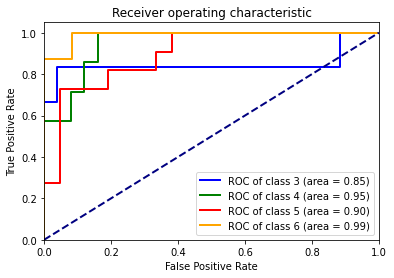

In [246]:
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score
y_score = model.predict_proba(X_test)
#Binarize the output
y_test_bin = label_binarize(y_test, classes=[3, 4, 5, 6])
n_classes = y_test_bin.shape[1]

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    if (i == 0):
        warna='blue'
        print('AUC untuk Class {} (biru)   : {}'.format(i+3,auc(fpr[i], tpr[i])))
    elif(i == 1):
        warna= 'green'
        print('AUC untuk Class {} (hijau)  : {}'.format(i+3,auc(fpr[i], tpr[i])))
    elif(i == 2):
        warna= 'red'
        print('AUC untuk Class {} (merah)  : {}'.format(i+3,auc(fpr[i], tpr[i])))
    else:
        warna= 'orange'
        print('AUC untuk Class {} (orange) : {}'.format(i+3,auc(fpr[i], tpr[i])))
    plt.plot(fpr[i], tpr[i], color=warna, lw=2,  label="ROC of class {} (area = %0.2f)".format(i+3) % auc(fpr[i], tpr[i]))
    
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

In [182]:
model.classes_

array([3, 4, 5, 6], dtype=int64)

In [183]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(128, 20)
(128,)
(32, 20)
(32,)


In [184]:
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(model.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(model.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.98
Accuracy of K-NN classifier on test set: 0.78


In [185]:
cm = confusion_matrix(y_test, yPred, labels=model.classes_)

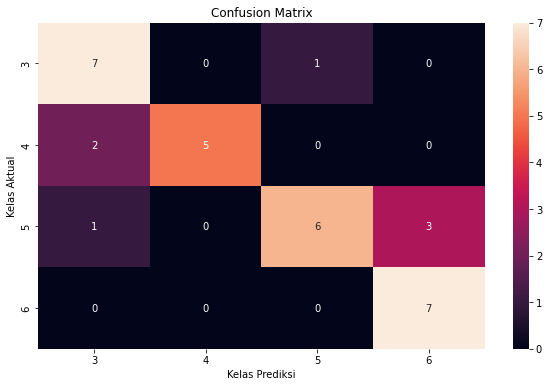

In [186]:
#importing packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
cm_df = pd.DataFrame(cm,
                     index = model.classes_, 
                     columns = model.classes_)

#Plotting the confusion matrix
plt.figure(figsize=(10,6))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Kelas Aktual')
plt.xlabel('Kelas Prediksi')
plt.show()

In [187]:
from sklearn.metrics import classification_report
target_names = ['3','4','5','6']
print(classification_report(y_test, yPred, target_names=target_names))

              precision    recall  f1-score   support

           3       0.70      0.88      0.78         8
           4       1.00      0.71      0.83         7
           5       0.86      0.60      0.71        10
           6       0.70      1.00      0.82         7

    accuracy                           0.78        32
   macro avg       0.81      0.80      0.79        32
weighted avg       0.81      0.78      0.78        32

